In [1]:
## Some Observations after Performing Analysis

# 1) As the first scatter plot shows, there is a very strong correlation between
#    distance from the equator (measured degrees latitude) and maximum temperatures.

# 2) The data plotted in the last grid shows that windspeeds tend to be higher
#    far north of the equator than they are far south of the equator.

# 3)  According to the data visually depicted in the 2nd and 3rd scatter plots,
#     there does not appear to be much of any relationship between distance from the
#     equator (in degrees latitude) and percentage of cloudiness or humidity.

# 4)  Generally, most locations in the sample have a greater than 60% level of humidity
#     regardless of the distance from the equator. It would be interesting to see if this
#     pattern was similar say 20 or 30 years ago, or even further back before global
#     warming became a hot topic (no pun intended).
##

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
import json
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Output/weather_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
counter = 0

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        counter += 1

# Print the city count to confirm sufficient count
print(len(cities))



597


In [4]:
# set a dataframe to hold variables
weather_data = pd.DataFrame({"Cities": cities})
weather_data.head()

,Cities
0,rikitea
1,jamestown
2,san patricio
3,longyearbyen
4,castro


## Perform API Calls

In [5]:

# Starting URL for Weather Map API Call
City = []
Country = []
Datetime = []
Latitude = []
Temperature = []
Humidity = []
Cloudiness = []
Windspeed = []

print("Beginning Data Retrieval")
print("----------------------------------")
for index, row in weather_data.iterrows():
    
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

    city = row['Cities']
    
    # update address key value
    
    city_url = (f"{url}&q={city}")
    
    # make request
    
    weather_response = requests.get(city_url)
 
    
#     # print the weather_json url, avoid doing for public github repos in order to avoid exposing key
    print(f"Processing record {index}: {city}. The url is included below.")
    print(city_url)
    
    # convert to json
    
    weather_json = weather_response.json()
    print("------------------------------------------")
    
    try:
        city = weather_json['name']
        City.append(city)
        country = weather_json['sys']['country']
        Country.append(country)
        datetime = weather_json['dt']
        Datetime.append(datetime)
        lat = weather_json['coord']['lat']
        Latitude.append(lat)
        temp = weather_json['main']['temp_max']
        Temperature.append(temp)
        humid = weather_json['main']['humidity']
        Humidity.append(humid)
        cloud = weather_json['clouds']['all']
        Cloudiness.append(cloud)
        windy = weather_json['wind']['speed']
        Windspeed.append(windy)
        
        # save data to a csv file

    except (KeyError, IndexError):
    
        print("city not tracked in weather app")
    
        print("skipped")
              
        
print("----------------------------")
print("  Data Retrieval Completed  ")
print("----------------------------")

Beginning Data Retrieval
----------------------------------
Processing record 0: rikitea. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=rikitea
------------------------------------------
Processing record 1: jamestown. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=jamestown
------------------------------------------
Processing record 2: san patricio. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=san patricio
------------------------------------------
Processing record 3: longyearbyen. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=longyearbyen
------------------------------------------
Processing record 4: castro. The url is included below.
http://api.openw

Processing record 37: thompson. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=thompson
------------------------------------------
Processing record 38: umm lajj. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=umm lajj
------------------------------------------
Processing record 39: taolanaro. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=taolanaro
------------------------------------------
city not tracked in weather app
skipped
Processing record 40: salinopolis. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=salinopolis
------------------------------------------
Processing record 41: tumannyy. The url is included below.
http://api.openweathermap.org/data/2.

Processing record 74: luderitz. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=luderitz
------------------------------------------
Processing record 75: auki. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=auki
------------------------------------------
Processing record 76: roquetas de mar. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=roquetas de mar
------------------------------------------
Processing record 77: ossora. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=ossora
------------------------------------------
Processing record 78: ciudad bolivar. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf

Processing record 113: avarua. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=avarua
------------------------------------------
Processing record 114: conceicao do araguaia. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=conceicao do araguaia
------------------------------------------
Processing record 115: grindavik. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=grindavik
------------------------------------------
Processing record 116: ranong. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=ranong
------------------------------------------
Processing record 117: cockburn town. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Im

Processing record 151: dikson. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=dikson
------------------------------------------
Processing record 152: amderma. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=amderma
------------------------------------------
city not tracked in weather app
skipped
Processing record 153: cape canaveral. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=cape canaveral
------------------------------------------
Processing record 154: kamaishi. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=kamaishi
------------------------------------------
Processing record 155: dunedin. The url is included below.
http://api.openweathermap.org/data/

Processing record 189: gardner. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=gardner
------------------------------------------
Processing record 190: kudat. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=kudat
------------------------------------------
Processing record 191: labuhan. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=labuhan
------------------------------------------
Processing record 192: bolsheustikinskoye. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=bolsheustikinskoye
------------------------------------------
city not tracked in weather app
skipped
Processing record 193: nouadhibou. The url is included below.
http://api.openweathermap.or

Processing record 227: worland. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=worland
------------------------------------------
Processing record 228: copiapo. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=copiapo
------------------------------------------
Processing record 229: laguna. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=laguna
------------------------------------------
Processing record 230: collie. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=collie
------------------------------------------
Processing record 231: mwinilunga. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45

Processing record 266: traralgon. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=traralgon
------------------------------------------
Processing record 267: ukiah. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=ukiah
------------------------------------------
Processing record 268: kaitangata. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=kaitangata
------------------------------------------
Processing record 269: aksarayskiy. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=aksarayskiy
------------------------------------------
Processing record 270: massakory. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3f

Processing record 305: soyo. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=soyo
------------------------------------------
Processing record 306: sao domingos. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=sao domingos
------------------------------------------
Processing record 307: vao. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=vao
------------------------------------------
Processing record 308: ostrovnoy. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=ostrovnoy
------------------------------------------
Processing record 309: paka. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b6

Processing record 343: morrope. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=morrope
------------------------------------------
Processing record 344: milkovo. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=milkovo
------------------------------------------
Processing record 345: kavieng. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=kavieng
------------------------------------------
Processing record 346: mountain home. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=mountain home
------------------------------------------
Processing record 347: tura. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf929

Processing record 381: hambantota. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=hambantota
------------------------------------------
Processing record 382: san vicente. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=san vicente
------------------------------------------
Processing record 383: redmond. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=redmond
------------------------------------------
Processing record 384: high level. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=high level
------------------------------------------
Processing record 385: sindor. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66

Processing record 419: tabou. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=tabou
------------------------------------------
Processing record 420: miri. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=miri
------------------------------------------
Processing record 421: barao de melgaco. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=barao de melgaco
------------------------------------------
Processing record 422: la asuncion. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=la asuncion
------------------------------------------
Processing record 423: malanville. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66

Processing record 457: bacolod. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=bacolod
------------------------------------------
Processing record 458: las cruces. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=las cruces
------------------------------------------
Processing record 459: saint anthony. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=saint anthony
------------------------------------------
Processing record 460: sobolevo. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=sobolevo
------------------------------------------
Processing record 461: kagalnitskaya. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

Processing record 496: usinsk. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=usinsk
------------------------------------------
Processing record 497: ayan. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=ayan
------------------------------------------
Processing record 498: batagay-alyta. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=batagay-alyta
------------------------------------------
Processing record 499: touros. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=touros
------------------------------------------
Processing record 500: snasa. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf4

Processing record 533: mpika. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=mpika
------------------------------------------
Processing record 534: vilyuysk. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=vilyuysk
------------------------------------------
Processing record 535: baruun-urt. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=baruun-urt
------------------------------------------
Processing record 536: lorengau. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=lorengau
------------------------------------------
Processing record 537: sabha. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c

Processing record 572: seoul. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=seoul
------------------------------------------
Processing record 573: anadyr. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=anadyr
------------------------------------------
Processing record 574: tazovskiy. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=tazovskiy
------------------------------------------
Processing record 575: neiafu. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680c9c0&q=neiafu
------------------------------------------
Processing record 576: asau. The url is included below.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=66a3fddbf9298364c6cf45b69680

## Store the collected data into a DataFrame

In [6]:
# Define a new DataFrame using the weather data collected.
weather_data_df = pd.DataFrame({"City": City, "Country": Country, 
                                "Datetime": Datetime, 
                                "Latitude": Latitude, "Max Temperature (F)": Temperature, "Humidity %": Humidity, 
                                "Cloudiness %": Cloudiness, "Windspeed (mph)": Windspeed})

weather_data_df.count()

City                   537
Country                537
Datetime               537
Latitude               537
Max Temperature (F)    537
Humidity %             537
Cloudiness %           537
Windspeed (mph)        537
dtype: int64

In [7]:
# copy the results into the previously defined csv file
weather_data_df.to_csv(output_data_file, index=False, header=True)
weather_data_df.head()

,City,Country,Datetime,Latitude,Max Temperature (F),Humidity %,Cloudiness %,Windspeed (mph)
0,Rikitea,PF,1538024715,-23.12,71.31,100,92,18.61
1,Jamestown,AU,1538024687,-33.21,67.26,29,0,10.89
2,San Patricio,PY,1538024715,-26.98,69.15,94,92,2.95
3,Longyearbyen,NO,1538020200,78.22,24.80,68,40,16.11
4,Castro,CL,1538024715,-42.48,44.13,100,92,8.32


In [8]:
# convert the timestamp in the data to determine the date and time (GMT) 
# the analysis was started
timestamp = weather_data_df.iloc[0,2]
print(timestamp)
converted_timestamp = pd.Timestamp(timestamp, unit='s')
print(converted_timestamp)

1538024715
2018-09-27 05:05:15


## Generate Scatter Plots to Visualize Results

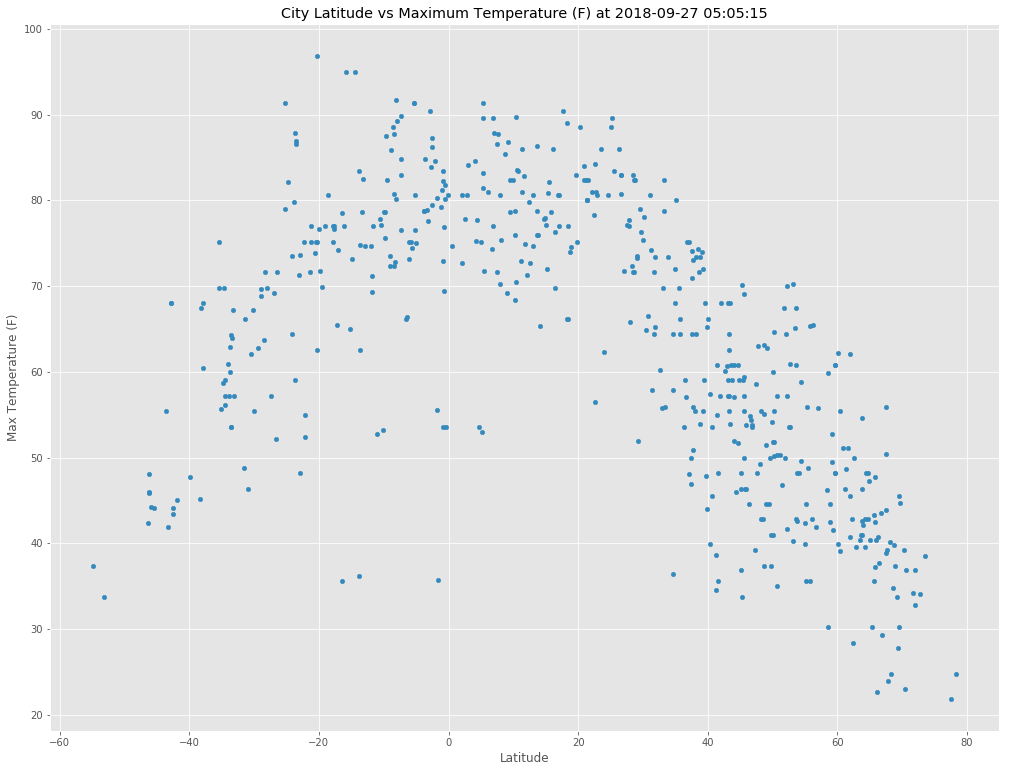

In [9]:

weather_data_df.plot(kind="scatter", x="Latitude", y="Max Temperature (F)", grid=True, 
                    figsize=(17, 13), title=f"City Latitude vs Maximum Temperature (F) at {converted_timestamp}")
plt.savefig("../Images/latitude_v_max_temp.png")
plt.show()

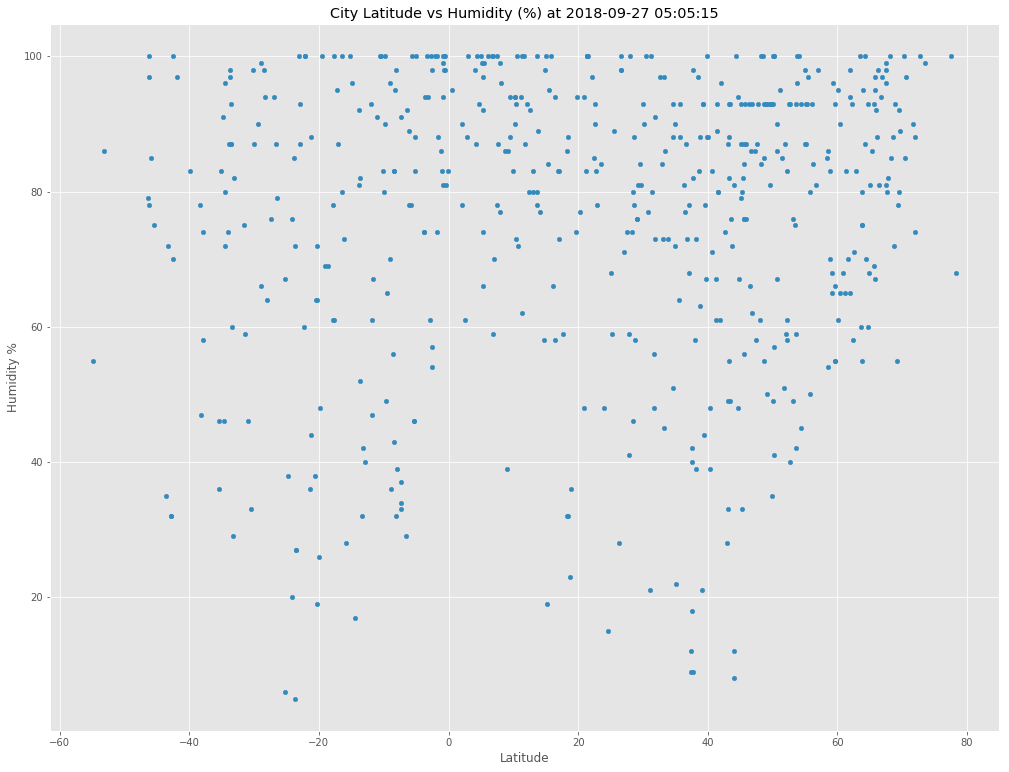

In [10]:
weather_data_df.plot(kind="scatter", x="Latitude", y="Humidity %", grid=True, 
                    figsize=(17,13), title=f"City Latitude vs Humidity (%) at {converted_timestamp}")
plt.savefig("../Images/latitude_v_humidity.png")
plt.show()

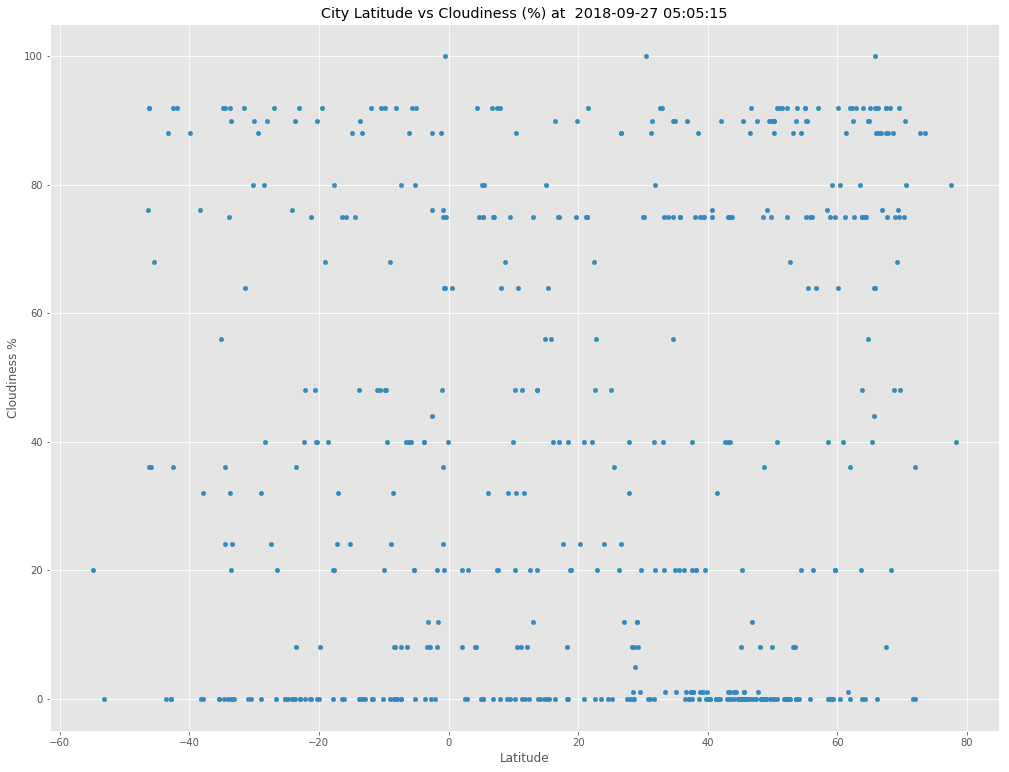

In [11]:
weather_data_df.plot(kind="scatter", x="Latitude", y="Cloudiness %", grid=True, 
                    figsize=(17,13), title=f"City Latitude vs Cloudiness (%) at  {converted_timestamp}")
plt.savefig("../Images/latitude_v_cloudiness.png")
plt.show()

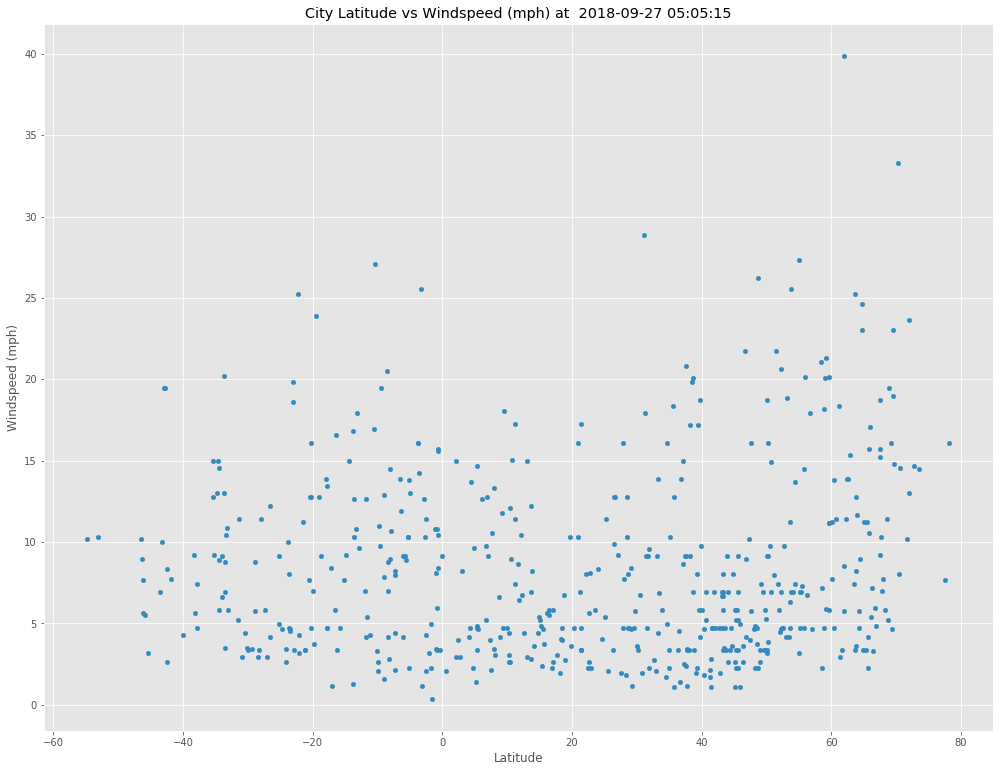

In [12]:
weather_data_df.plot(kind="scatter", x="Latitude", y="Windspeed (mph)", grid=True, 
                    figsize=(17,13), title=f"City Latitude vs Windspeed (mph) at  {converted_timestamp}")
plt.savefig("../Images/latitude_v_windspeed.png")
plt.show()